# Problem 3-3: Kleinberg Network Model

## 1. Kleinberg Random Network Generator

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random 

In [3]:
def euclid_dist(x,y):
    return np.sqrt(abs(x[0]-y[0])**2 + abs(x[1]-y[1])**2)


def kleinberg(l, a):
    #create lattice netwrok with l^2 nodes
    G = nx.grid_graph(dim=[l,l])
    nodes = G.nodes
    
    #try to add link for every node x
    for x in nodes:
        
        #create a list of all possible target nodes y
        Y = list(G)
        Y.remove(x)
        
        #calculate probability that node x is linked with the target nodes y
        #formula given by the question
        dist = np.array([euclid_dist(x, y) for y in Y])
        C_x = np.sum(dist**(-a))
        P_x = (1/C_x)*(dist**(-a))
        
        #create a weighted list of choice, weight of node y is p_x(y)
        choice = []
        for y in range(len(Y)):      
            weight = int(P_x[y]*100)
            choice = choice + [y]*(weight) 
        #choose a random target node y from choice
        target= Y[random.choice(choice)]
        
        #add new link (x, target) if it doesn't already exist
        if (x,target) not in G.edges():
            print("add link {} for edge {}".format((x,target), x))
            G.add_edge(x,target)
        
    return G


add link ((0, 0), (2, 2)) for edge (0, 0)
add link ((0, 1), (1, 2)) for edge (0, 1)
add link ((0, 2), (2, 0)) for edge (0, 2)
add link ((1, 0), (2, 2)) for edge (1, 0)
add link ((1, 1), (2, 0)) for edge (1, 1)


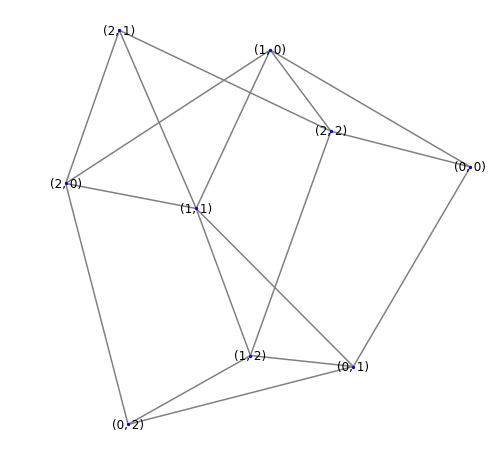

In [8]:
#test
G = kleinberg(3,1)

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.axis('off')
nx.draw_networkx(G,  edge_color="gray", font_color="black", width=1.5, node_size=5, node_color="b")
plt.show()